In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_wine

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
data = load_wine(as_frame=True)
df = data.data.copy()  # features
# Look at the documentation (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)
# and save the label in a column called 'y' in df.
df['y'] = data['target'] ## YOUR CODE HERE # label
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
#How many samples and features are there?

# YOUR CODE HERE
samples = df.size
features = len(data['feature_names'])
print('number of samples:',samples, 'number of features:', features)

number of samples: 2492 number of features: 13


In [4]:
# Quiz Q1
# How many instances are there for each class? 

# YOUR CODE HERE
df['y'].value_counts()

1    71
0    59
2    48
Name: y, dtype: int64

In [5]:
# Calculate the means, medians, and standard deviations of each feature
# YOUR CODE HERE
columns = data['feature_names']
mean = []
median = []
std = []
for i in columns:
    mean.append(df[i].mean())
    median.append(df[i].median())
    std.append(df[i].std())
total_data = {'mean':mean,'median':median,'std':std}
results = pd.DataFrame(total_data,index=columns)
results

,mean,median,std
alcohol,13.000618,13.050,0.811827
malic_acid,2.336348,1.865,1.117146
ash,2.366517,2.360,0.274344
alcalinity_of_ash,19.494944,19.500,3.339564
magnesium,99.741573,98.000,14.282484
total_phenols,2.295112,2.355,0.625851
flavanoids,2.029270,2.135,0.998859
nonflavanoid_phenols,0.361854,0.340,0.124453
proanthocyanins,1.590899,1.555,0.572359
color_intensity,5.058090,4.690,2.318286


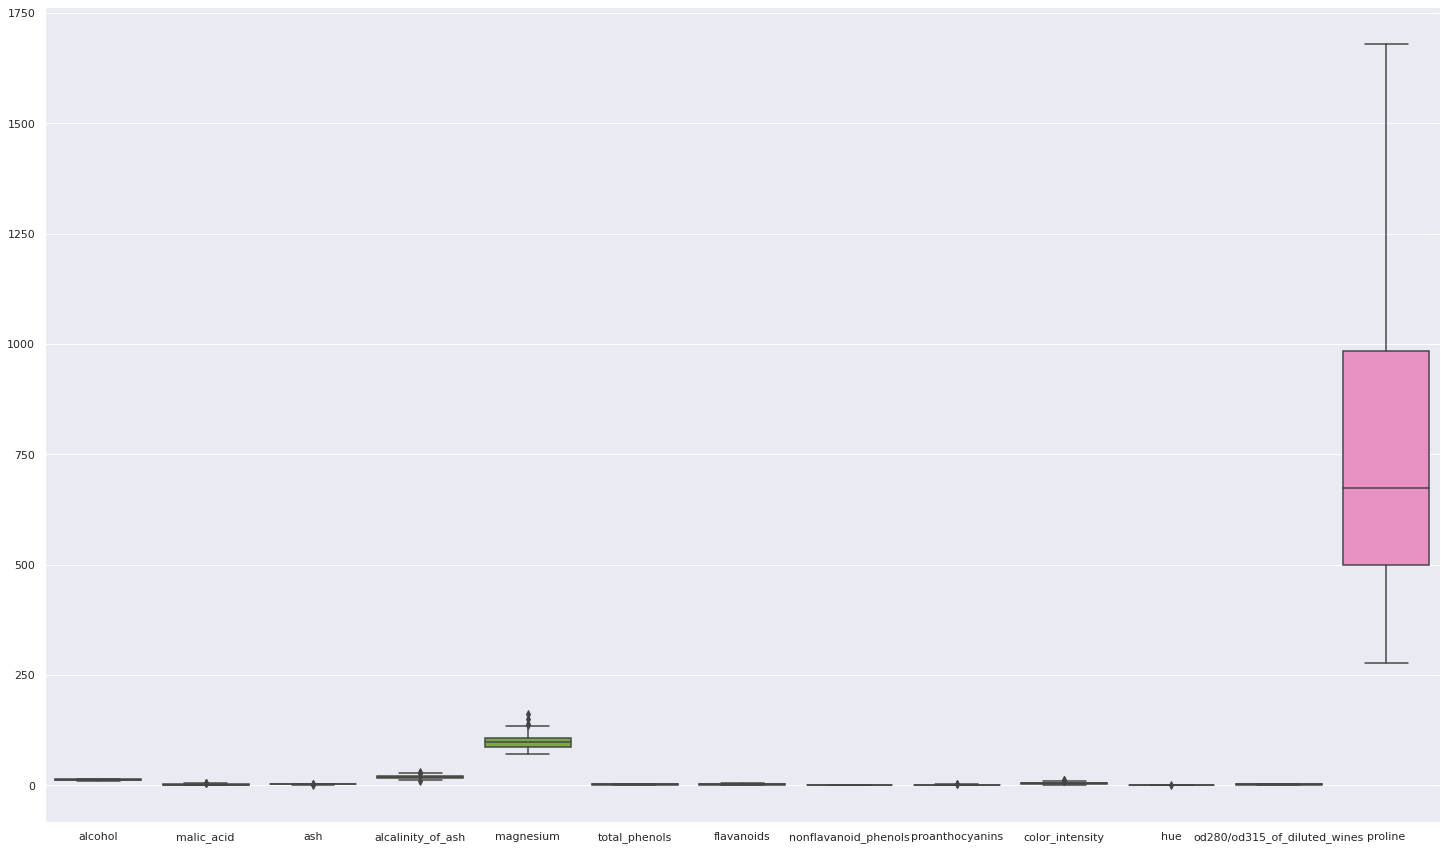

In [6]:
# Plot a boxplot of each feature (NOT THE LABEL!!) (all in one plot -- you can do this with a single line of code).
# Quiz Q2: Is there any feature that is in a clearly different scale than the others?

# YOUR CODE HERE
sns.set(rc={'figure.figsize':(25,15)})
sns.boxplot(data=df.drop('y',axis=1))

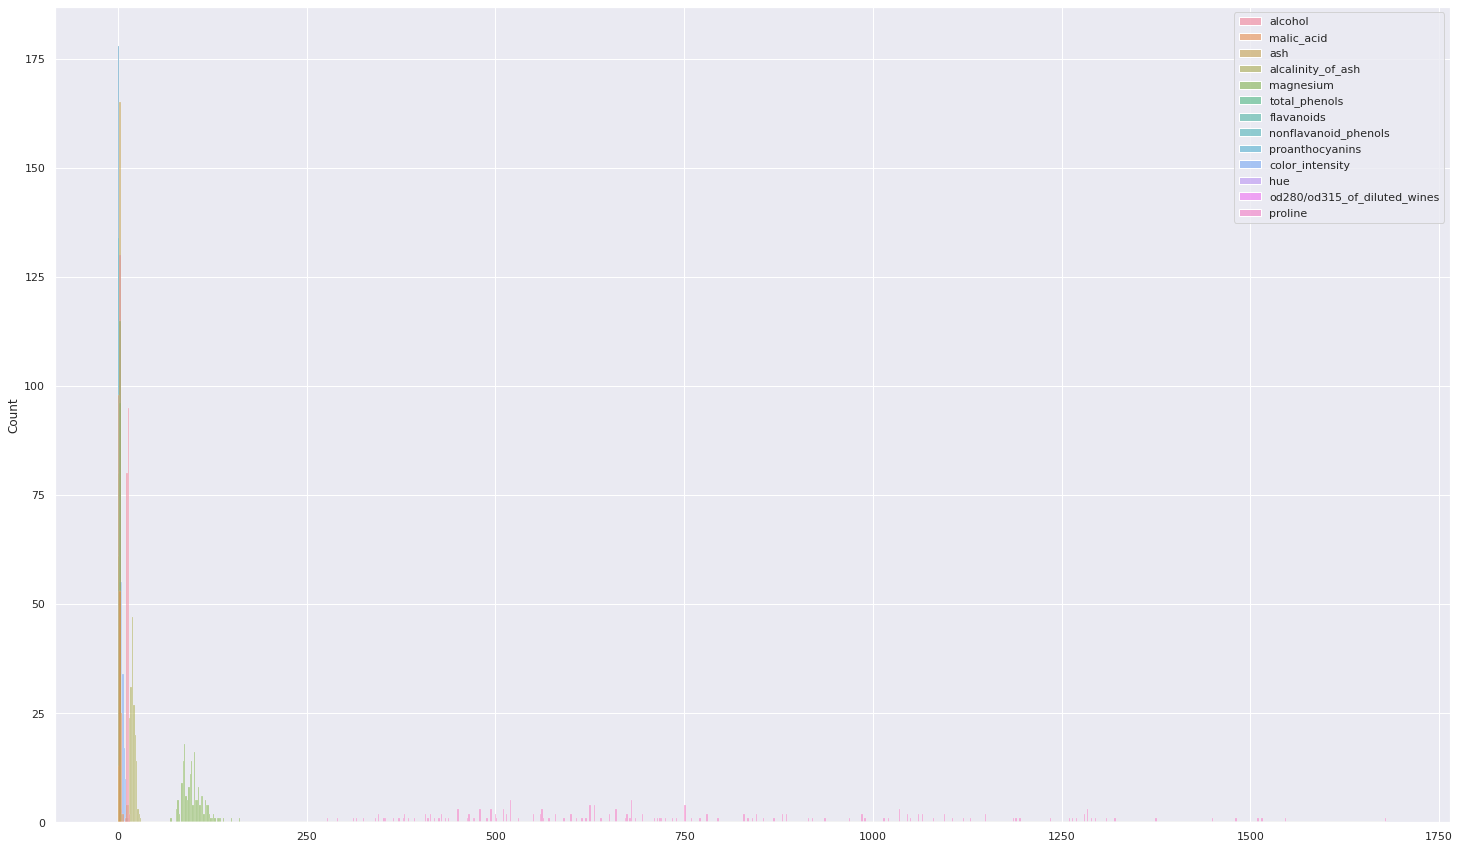

In [7]:
# Let's look at the distributions of values of our features. Draw a histogram for each of the features

# YOUR CODE HERE
sns.histplot(data=df.drop('y',axis=1))

od280/od315_of_diluted_wines  ash                             0.003911
ash                           od280/od315_of_diluted_wines    0.003911
proanthocyanins               ash                             0.009652
ash                           proanthocyanins                 0.009652
alcalinity_of_ash             color_intensity                 0.018732
color_intensity               alcalinity_of_ash               0.018732
proanthocyanins               color_intensity                 0.025250
color_intensity               proanthocyanins                 0.025250
malic_acid                    magnesium                       0.054575
magnesium                     malic_acid                      0.054575
total_phenols                 color_intensity                 0.055136
color_intensity               total_phenols                   0.055136
magnesium                     hue                             0.055398
hue                           magnesium                       0.055398
magnes

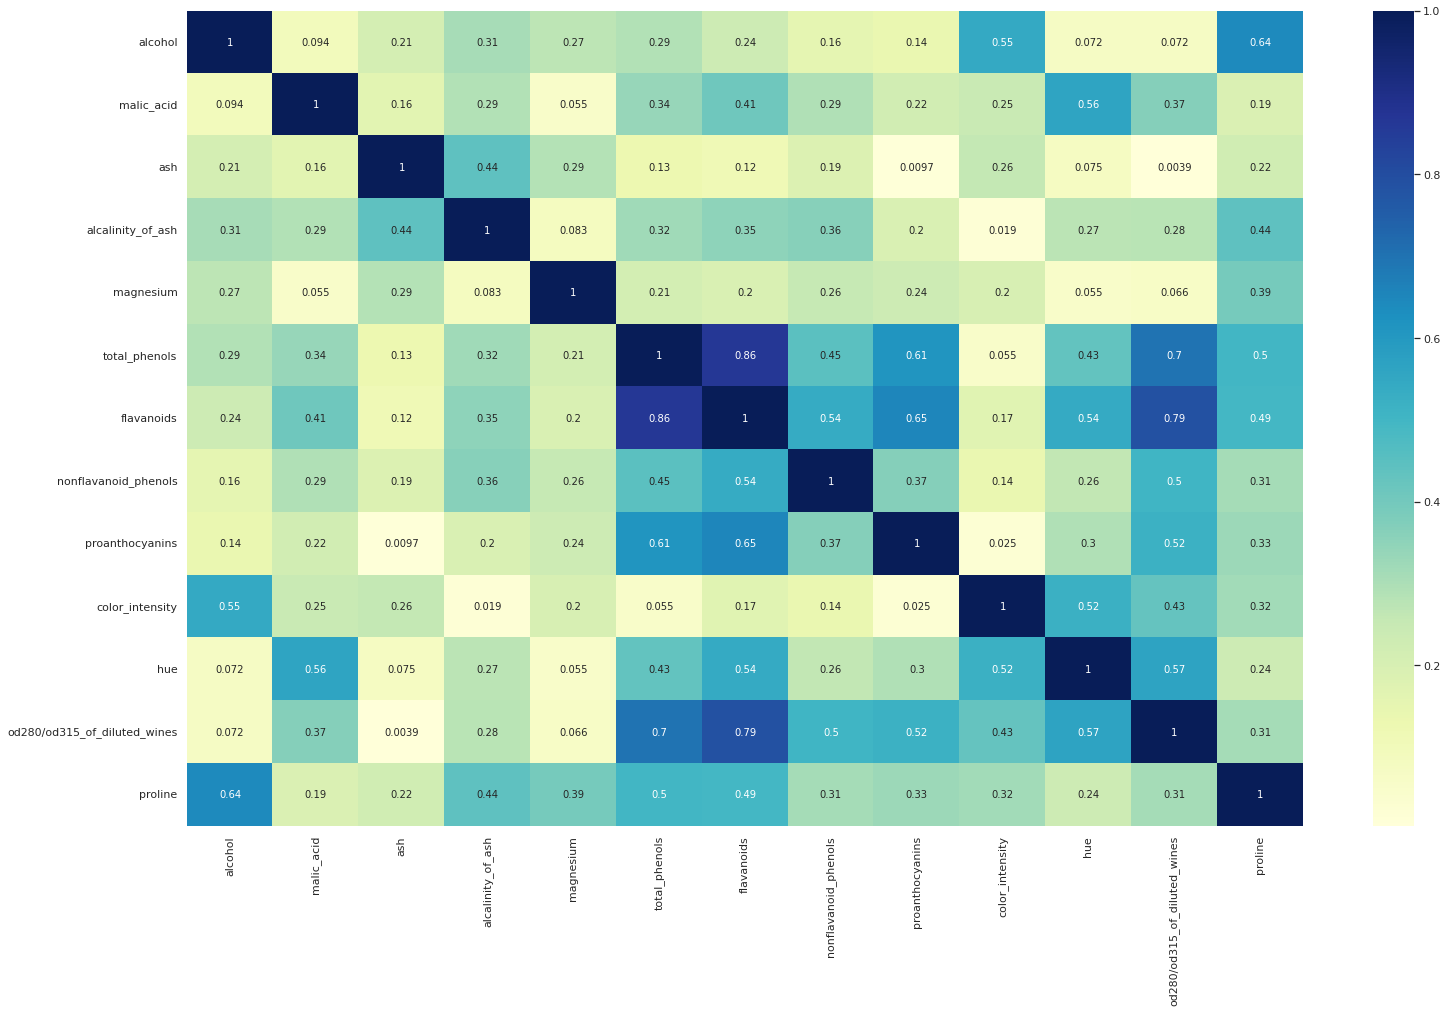

In [8]:
# Calculate the correlations between each pair of variables

# YOUR CODE HERE
pd.set_option('display.max_rows',200)
cols = df.drop('y',axis=1).columns
corr = df[cols].corr().abs()
s = corr.unstack()
so = s.sort_values(kind="quicksort")
print(so)

# Plot a heatmap of the correlations between pairs of FEATURES (i.e., don't include the target!)

# YOUR CODE HERE
dataplot = sns.heatmap(corr, cmap="YlGnBu", annot=True , annot_kws={'size': 10})


In [9]:
# What is the highest correlation between features?
# Answer: Highest correlated features are total_phenols and flavanoids 

In [10]:
# Let's do PCA:
# HINT: I suggest you attempt Q5 of the quiz and then use the function you developed
#       in this and some of the following cells.

# 1. Standardise your data using a StandardScaler. Make sure you're not scaling the 'y'!
# YOUR CODE HERE
sc = StandardScaler()
data_frame = sc.fit_transform(df.drop('y',axis=1))
data_frame = pd.DataFrame(data_frame,columns=df.drop('y',axis=1).columns)
data_frame['y'] = df['y']
data_frame

# 2. Do PCA with 2 components. How much variance is retained from the original dataset?
# YOUR CODE HERE
pca_2 = PCA(n_components=2)
data_pca_2 = pca_2.fit_transform(data_frame.drop('y',axis=1))
#pca.explained_variance_ratio_

print(round(pca_2.explained_variance_ratio_.sum()*100, 1),
"% of variance explained by",pca_2.n_components_,"components.")

55.4 % of variance explained by 2 components.


Text(0, 0.5, 'Second Principle Component')

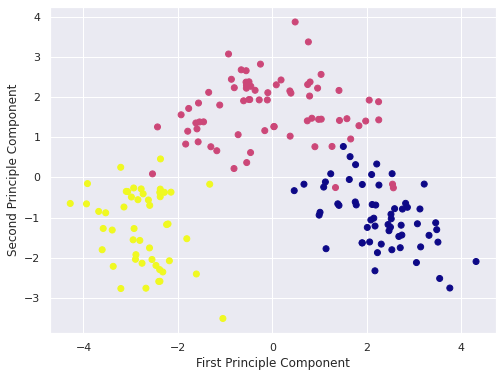

In [11]:
# Plot your two components, using the label from the data to colour the points
# YOUR CODE HERE
plt.figure(figsize=(8,6))
plt.scatter(data_pca_2[:,0],data_pca_2[:,1],c=data_frame['y'],cmap='plasma')
plt.xlabel("First Principle Component")
plt.ylabel("Second Principle Component")

In [12]:
# How many components do you need to keep at least 85% of the variance in the dataset? (Q6)

# YOUR CODE HERE

for i in range(10):
  pca = PCA(n_components=i)
  data_pca = pca.fit_transform(data_frame.drop('y',axis=1))
  
  print(round(pca.explained_variance_ratio_.sum()*100, 1),
  "% of variance explained by",pca.n_components_,"components.")


0.0 % of variance explained by 0 components.
36.2 % of variance explained by 1 components.
55.4 % of variance explained by 2 components.
66.5 % of variance explained by 3 components.
73.6 % of variance explained by 4 components.
80.2 % of variance explained by 5 components.
85.1 % of variance explained by 6 components.
89.3 % of variance explained by 7 components.
92.0 % of variance explained by 8 components.
94.2 % of variance explained by 9 components.


In [13]:
# How much variance is retained if we do PCA with 3 components? (Q7)

# YOUR CODE HERE
pca_3 = PCA(n_components=3)
data_pca_3 = pca_3.fit_transform(data_frame.drop('y',axis=1))
pca_3.explained_variance_ratio_

print(round(pca_3.explained_variance_ratio_.sum()*100, 1),
"% of variance explained by", pca_3.n_components_, "components.")

66.5 % of variance explained by 3 components.


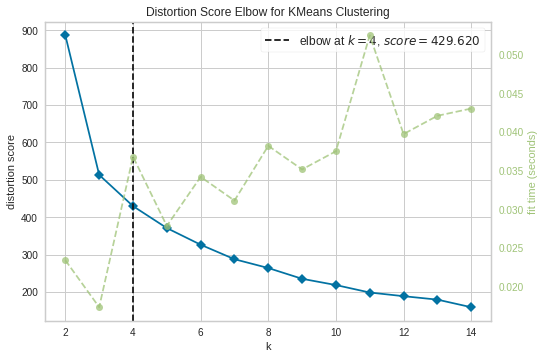

In [14]:
# Use the elbow method to select the number of clusters in your data using 3 PCs.

# YOUR CODE HERE
from yellowbrick.cluster import KElbowVisualizer
k_model = KMeans()
visual = KElbowVisualizer(k_model, k=(2,15), timings= True)
visual.fit(data_pca_3)
visual.show()

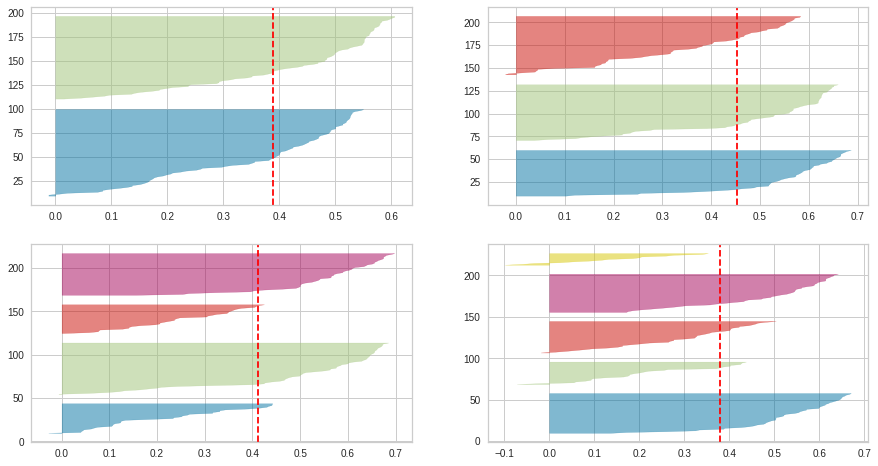

In [15]:
# Now use the silhouette score to choose between the two candidate k values from the previous cell

# YOUR CODE HERE
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_pca_3)

Text(0, 0.5, 'Second Principle Component')

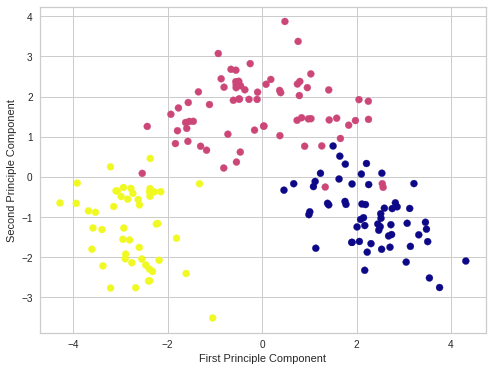

In [16]:
# Visualise the first two pcs (using a scatterplot) using the labels from KMeans with your chosen value of k

# YOUR CODE HERE
plt.figure(figsize=(8,6))
plt.scatter(data_pca_3[:,0],data_pca_3[:,1],c=data_frame['y'],cmap='plasma')
plt.xlabel("First Principle Component")
plt.ylabel("Second Principle Component")

In [17]:
# In the original (before PCA and before standardisation) dataframe, add a column called 'cluster' that contains
# the cluster assignment from above

# YOUR CODE HERE
pd.concat([df,pd.DataFrame(data_pca_3,columns=['pc1','pc2','pc3'])])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y,pc1,pc2,pc3
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0,NaN,NaN,NaN
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0,NaN,NaN,NaN
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0,NaN,NaN,NaN
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0,NaN,NaN,NaN
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.370524,-2.216289,-0.342570
174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.601956,-1.757229,0.207581
175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.677839,-2.760899,-0.940942
176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.387017,-2.297347,-0.550696


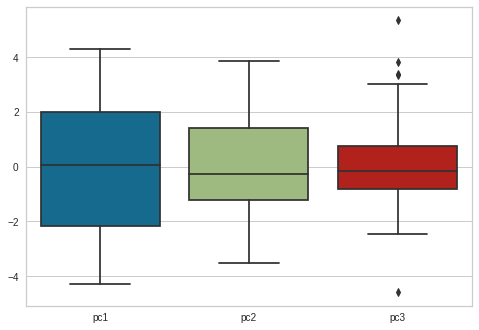

In [18]:
# Do a boxplot of each feature, separating between clusters

# YOUR CODE HERE
dff = pd.DataFrame(data_pca_3,columns=['pc1','pc2','pc3'])
sns.boxplot(data=dff)